In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using DSP

In [2]:
background_hist = load("../data/experiment/m2/background-2.jld2");

In [3]:
hist_cam_tmp = background_hist["cam_3"];

α = 2
μ = 60

array_ind = 1:4096

edges = hist_cam_tmp.edges[1][1:end-1]
background_vals = hist_cam_tmp.weights

signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)

signal_conv = DSP.conv(signal_vals, background_vals)[1:4096]

# signal_vals = signal_vals ./ sum(signal_vals);

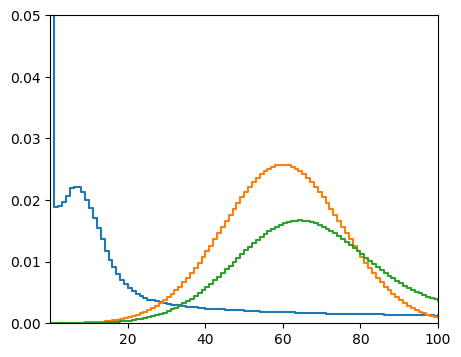

(0.0, 0.05)

In [4]:
fig, ax = plt.subplots(1,1, figsize=(5,4))

ax.step(edges, background_vals, where="post")
ax.step(edges, signal_vals, where="post")
ax.step(edges, signal_conv, where="post")

ax.set_xlim(0.01, 100)
ax.set_ylim(0.0, 0.05)

# ax.set_yscale("log")
# ax.set_xscale("log")

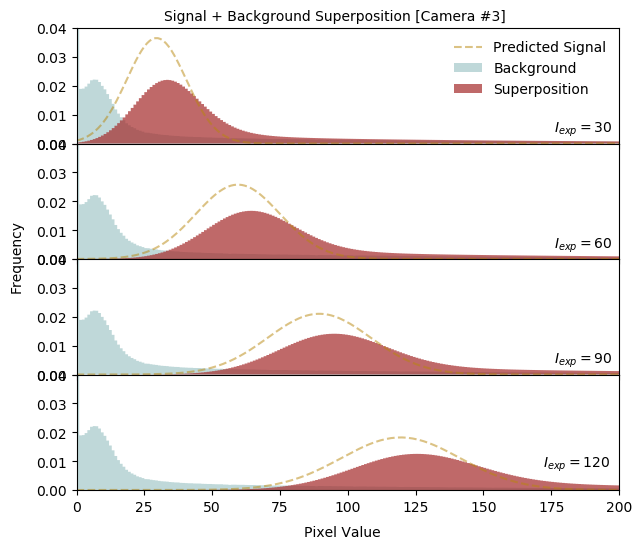

PyObject Text(0.25, 0.9, 'Signal + Background Superposition [Camera #3]')

In [5]:
backgroundcolor = "cadetblue"
signalcolor = "darkgoldenrod"
convcolor = "brown" 

fig, ax = plt.subplots(4,1, figsize=(7,6), sharex=true, sharey=true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

#subplot 1:
μ = 30
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[1].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "Background")
ax[1].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "Predicted Signal")
# ax[1].step(edges, signal_conv, where="post", alpha=1, linewidth=2, color=convcolor, label = "S - B")
ax[1].fill_between(edges, signal_conv,step="post", alpha=0.7, linewidth=0, color=convcolor, label = "Superposition")
ax[1].text(0.88,0.1,L"I_{exp}=30", transform=ax[1].transAxes)
ax[1].legend(loc="upper right", ncol=1, framealpha=0.0)

#subplot 2:
μ = 60
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[2].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[2].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[2].fill_between(edges, signal_conv,step="post", alpha=0.7, linewidth=0, color=convcolor, label = "S - B")
ax[2].text(0.88,0.1,L"I_{exp}=60", transform=ax[2].transAxes)

#subplot 3:
μ = 90
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[3].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[3].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[3].fill_between(edges, signal_conv,step="post", alpha=0.7, linewidth=0, color=convcolor, label = "S - B")
ax[3].text(0.88,0.1,L"I_{exp}=90", transform=ax[3].transAxes)

#subplot 4:
μ = 120
signal_vals = cdf.(truncated(Normal(μ, α*sqrt(μ)), minimum(hist_cam_tmp.edges[1]), maximum(hist_cam_tmp.edges[1])), hist_cam_tmp.edges[1])
signal_vals = diff(signal_vals)
signal_conv = DSP.conv(signal_vals, background_vals)[array_ind]

ax[4].fill_between(edges, background_vals, step="post", color=backgroundcolor, linewidth=0.0, alpha=0.4, label = "B")
ax[4].plot(edges, signal_vals, linestyle="--", color=signalcolor, linewidth=1.5, alpha=0.5, label = "B")
ax[4].fill_between(edges, signal_conv,step="post", alpha=0.7, linewidth=0, color=convcolor, label = "S - B")
ax[4].text(0.86,0.2,L"I_{exp}=120", transform=ax[4].transAxes)

ax[1].set_xlim(0.0, 200)
ax[1].set_ylim(0.0, 0.04)

fig.text(0.03, 0.5, "Frequency", va="center", rotation="vertical")
fig.text(0.45, 0.04, "Pixel Value", va="center", rotation="horizontal")
fig.text(0.25, 0.9, "Signal + Background Superposition [Camera #3]", va="center", rotation="horizontal")